# Phase 0: Imports

Loading required python packages.

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.correlation import plot_corr
%matplotlib inline

#models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor 

#metrics, procssing and model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Phase 1: Data Collection

As kaggle already provided us with data in the form of csv files, all we have to do is load them into dataframes.

In [190]:
#loading csv's
train=pd.read_csv('df - train_set.csv')
test=pd.read_csv('df - test_set.csv')

# Phase 2: Data Cleaning

Kaggle tries to provide us with clean data but it's always a good idea to check for ourselves.

In [191]:
#Checking for null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


In [192]:
train.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

None of the columns contain any null values.

Moreover, we note that the DataFrame consists of 13 columns.(12 predictors and 1 response)

The predictor variables are broken down into the following types:

    -object: Province, Container, Size_Grade, Commodities and Date

    -float: Weight_Kg, Low_Price, High_Price and Sales_Total

    -integer: Total_Qty_Sold, Total_Kg_Sold and Stock_On_Hand
    
with the response variable(avg_price_per_kg) being a float.
    
As we can see in the next cell, the table contains information about 'Commodoties that we are not interested in, we filter only for 'APPLE GOLDEN DELICIOUS'.

In [193]:
train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [194]:
#Filter for Golden Delicious Apples
train=train[train['Commodities']=='APPLE GOLDEN DELICIOUS']
train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


We may as well remove the "Commodities" column as it has no more useful information.

In [195]:
#Remove Commodities
train=train.drop(["Commodities"],axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Date              1952 non-null   object 
 5   Low_Price         1952 non-null   float64
 6   High_Price        1952 non-null   float64
 7   Sales_Total       1952 non-null   float64
 8   Total_Qty_Sold    1952 non-null   int64  
 9   Total_Kg_Sold     1952 non-null   float64
 10  Stock_On_Hand     1952 non-null   int64  
 11  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 198.2+ KB


# Phase 3: Exploratory Data Analysis

## 3.1: Univariate Analysis

#### 3.1.1: Numeric data

In [196]:
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


In [197]:
train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

We can see that all of our numeric predictors are highly skewed. While our response variable is fairly symmetrical.

In [198]:
train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

As expected the kurtosis indicates strong outliers in the predictor variables. This is highlighted by the fact that the mean of our predictor values lean much closer toward their minimum values while the maximum values are many standard deviations away.

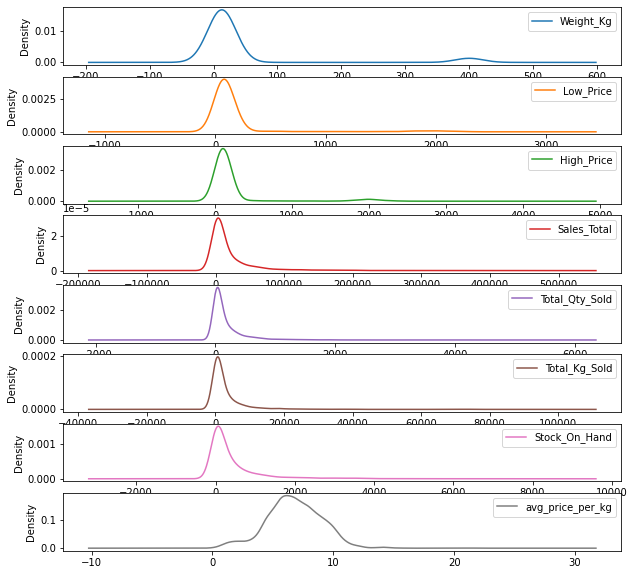

In [199]:
features=[]
for x in train.columns:
    if np.issubdtype(train[x].dtype, np.number)==True:
        features.append(x)
train[features].plot(kind='density', subplots=True, sharex=False, figsize=(10, 10));

These variables appear to be normally distributed with either some skewness or some completely seperate bumps. This is caused by the outliers.

We remove the outliers by converting values to their z-score and removing those z-scores with an absolute value greater than 3.

In [200]:
#Remove outliers using z-score
for i in features:
    z_mean=train[i].mean()
    z_std=train[i].std()
    train['zscore']=abs((train[i]-z_mean)/z_std)
    train=train[train['zscore']<3]
    train=train.drop('zscore',axis=1)
train.head()

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
80,CAPE,JE090,2S,9.0,2020-03-13,55.0,55.0,4840.0,88,792.0,181,6.11


In [201]:
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000
mean,12.742640,84.369221,102.372263,10779.321776,118.315693,1494.513990,319.843674,6.918425
std,4.048532,45.477576,52.496762,14792.191679,148.502259,1906.601324,452.675560,2.110512
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.550000
25%,9.000000,50.000000,60.000000,1053.750000,13.000000,164.700000,11.750000,5.560000
50%,12.000000,70.000000,96.000000,4480.000000,60.000000,732.000000,134.000000,6.745000
75%,18.300000,118.500000,140.000000,14294.000000,169.250000,1984.050000,430.000000,8.392500
max,18.300000,220.000000,260.000000,96260.000000,778.000000,8655.900000,2361.000000,13.070000


In [202]:
train.skew()

Weight_Kg           0.283771
Low_Price           0.697714
High_Price          0.446422
Sales_Total         2.067655
Total_Qty_Sold      1.841766
Total_Kg_Sold       1.729352
Stock_On_Hand       2.179969
avg_price_per_kg   -0.118437
dtype: float64

In [203]:
train.kurtosis()

Weight_Kg          -1.050116
Low_Price          -0.246510
High_Price         -0.805569
Sales_Total         4.419355
Total_Qty_Sold      3.279708
Total_Kg_Sold       2.380347
Stock_On_Hand       4.958846
avg_price_per_kg   -0.109211
dtype: float64

Most of the kurtosis values are less than 3 which indicates we have removed the outliers. 

Some of our predictor values still display high skewness but this is to be expected.

For example, when looking at a column like Sales_Total, many places can have sales up to a certain point but after a certain amount only the biggest place can make that much in sales. This would skew our data toward the more 'acheivable' Sales_total values.

Convert date to datetime to avoid mismanagement when handling categorical data.

In [227]:
#Date (object) --> Date (datetime)
train['Date'] = pd.to_datetime(train['Date'])

We also require our numeric data to be standardized (for lasso and ridge regression) before the addition of dummy variables.

In [206]:
#we dont want to scale the response variable
features.remove('avg_price_per_kg')
features

['Weight_Kg',
 'Low_Price',
 'High_Price',
 'Sales_Total',
 'Total_Qty_Sold',
 'Total_Kg_Sold',
 'Stock_On_Hand']

In [209]:
#scaling and adding scaled data back to train dataframe
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train[features])
X_standardise = pd.DataFrame(X_scaled,columns=features)
for x in features:
    train=train.drop(x,axis=1)
    train[x]=X_standardise[x]
train.head()

,Province,Container,Size_Grade,Date,avg_price_per_kg,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
1,CAPE,M4183,1L,2020-09-09,8.51,-0.430568,-0.755970,-0.997932,0.353042,1.358536,1.062677,-0.706778
7,CAPE,JG110,2M,2020-04-14,4.55,-0.183490,0.431790,0.031016,-0.567183,-0.642042,-0.639297,-0.706778
24,W.CAPE-BERGRIVER ETC,JE090,2S,2020-04-16,6.11,-0.183490,0.783719,0.335889,-0.720824,-0.790233,-0.777806,-0.565353
40,CAPE,M4183,1S,2020-05-04,4.51,-0.924725,-0.975925,-1.188478,0.894033,3.244603,2.049025,-0.706778
80,CAPE,JE090,2S,2020-03-13,6.11,-0.924725,-0.975925,-0.997932,0.013233,1.008266,0.481362,-0.532207


#### 3.1.3: Categorical Data

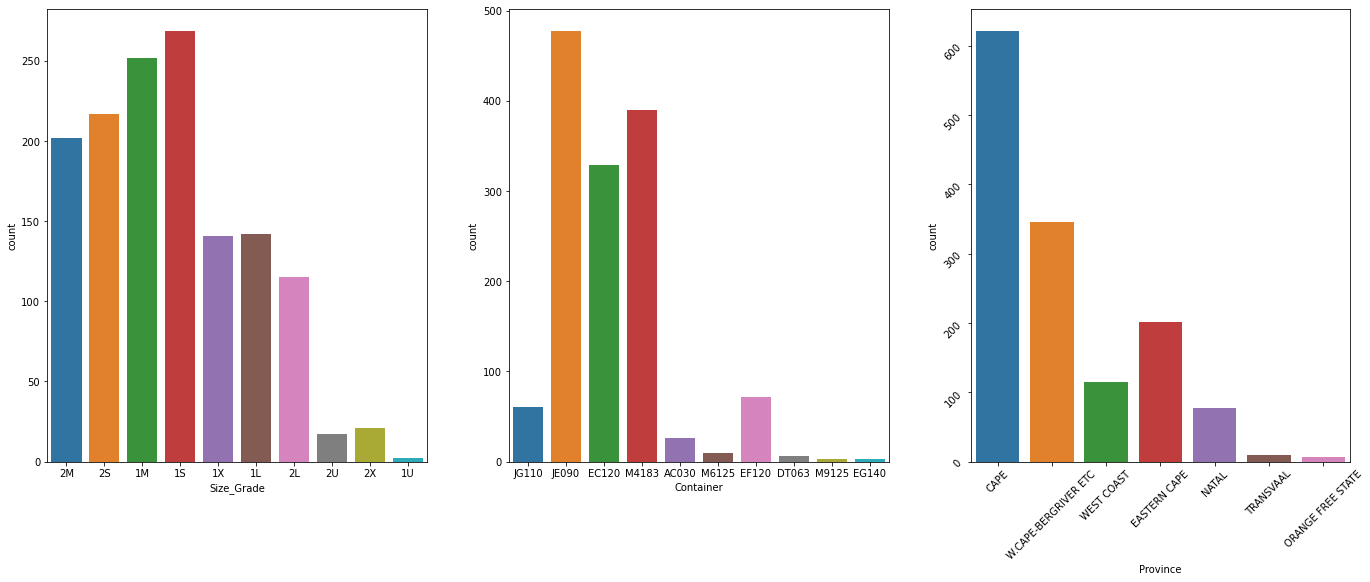

In [146]:
#Plot countplots of categorical data
fig, ax =plt.subplots(1,3, figsize=(20, 9))
sns.countplot(x=train['Size_Grade'], ax=ax[0])
sns.countplot(x=train['Container'], ax=ax[1])
sns.countplot(x="Province", data=train, ax=ax[2])
ax[2].tick_params(labelrotation=45)
fig.tight_layout(pad=4.0)

Most of the Golden Delicious Apples are found in the cape, have a size grade of 1S and are in containers 'M4183', 'JE090 and 'EC120'.

Before continuing the analysis we should note that numerical data is required for regression analysis. As such we will now transform our categorical data into numerical values using dummy variables.

In [217]:
train_dummies = pd.get_dummies(train,drop_first=True)

In [218]:
train_dummies.head()

,Date,avg_price_per_kg,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
1,2020-09-09,8.51,-0.430568,-0.755970,-0.997932,0.353042,1.358536,1.062677,-0.706778,0,...,0,0,0,0,0,0,0,0,0,0
7,2020-04-14,4.55,-0.183490,0.431790,0.031016,-0.567183,-0.642042,-0.639297,-0.706778,0,...,0,0,0,0,0,0,1,0,0,0
24,2020-04-16,6.11,-0.183490,0.783719,0.335889,-0.720824,-0.790233,-0.777806,-0.565353,0,...,0,0,0,0,0,0,0,1,0,0
40,2020-05-04,4.51,-0.924725,-0.975925,-1.188478,0.894033,3.244603,2.049025,-0.706778,0,...,0,0,1,0,0,0,0,0,0,0
80,2020-03-13,6.11,-0.924725,-0.975925,-0.997932,0.013233,1.008266,0.481362,-0.532207,0,...,0,0,0,0,0,0,0,1,0,0


## 3.2: Multivariate Analysis

We start by evaluating the relationship between the date and our response variable

In [219]:
#seperating date,month and year
training_day=pd.DataFrame([])
training_day['avg_price_per_kg']=train['avg_price_per_kg']
training_day['Date']=train['Date']
training_day['Day']=[x.day for x in train['Date']]
training_day['Month']=[x.month for x in train['Date']]
training_day['Month_year']=[pd.to_datetime(x, format='%m%Y') for x in train['Date']]
training_day['Quarter'] = pd.PeriodIndex(train.Date, freq='Q')
training_day.head()

,avg_price_per_kg,Date,Day,Month,Month_year,Quarter
1,8.51,2020-09-09,9,9,2020-09-09,2020Q3
7,4.55,2020-04-14,14,4,2020-04-14,2020Q2
24,6.11,2020-04-16,16,4,2020-04-16,2020Q2
40,4.51,2020-05-04,4,5,2020-05-04,2020Q2
80,6.11,2020-03-13,13,3,2020-03-13,2020Q1


<AxesSubplot:xlabel='Date', ylabel='avg_price_per_kg'>

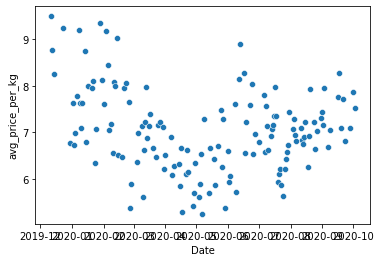

In [220]:
#Plotting the mean avg_price_per_kg against the Date
avg_date=training_day.groupby('Date')['avg_price_per_kg'].mean()
sns.scatterplot(x=avg_date.index,y=avg_date)

As we can see from this plot, there isn't much of a relatioship between these two variables, in the following cells we attempt to see if there is a relationship between the components of the date (Day,Month,Year) and our response variable.

<AxesSubplot:xlabel='Day', ylabel='avg_price_per_kg'>

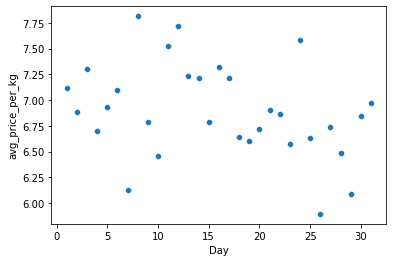

In [221]:
avg_day=training_day.groupby('Day')['avg_price_per_kg'].mean()
sns.scatterplot(x=avg_day.index,y=avg_day)

-There is no clear trend amongst this data

<AxesSubplot:xlabel='Month', ylabel='avg_price_per_kg'>

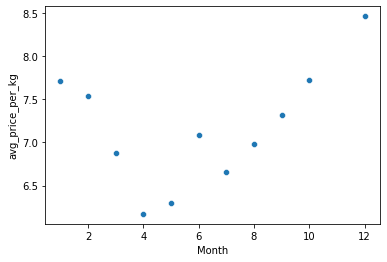

In [222]:
avg_month=training_day.groupby('Month')['avg_price_per_kg'].mean()
sns.scatterplot(x=avg_month.index,y=avg_month)

The middle months seem to have lower means while the end and start months have higher means

<AxesSubplot:xlabel='Quarter', ylabel='avg_price_per_kg'>

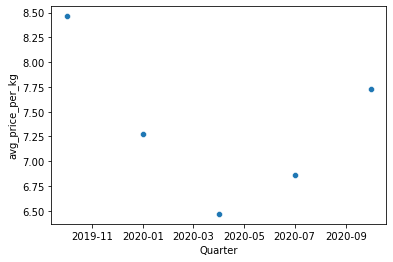

In [223]:
avg_quarter=training_day.groupby('Quarter')['avg_price_per_kg'].mean()
sns.scatterplot(x=avg_quarter.index.to_timestamp(),y=avg_quarter)

As we saw by the trend in the months plot, the response variable appears to fall as we go toward the middle of the year and then rise as the year ends

In [224]:
#Dropping the non-numeric 'Date' column and adding a Month column
train_dummies['Month']=training_day['Month']
train_dummies=train_dummies.drop('Date',axis=1)

In [225]:
train_dummies.head()

,avg_price_per_kg,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,...,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Month
1,8.51,-0.430568,-0.755970,-0.997932,0.353042,1.358536,1.062677,-0.706778,0,0,...,0,0,0,0,0,0,0,0,0,9
7,4.55,-0.183490,0.431790,0.031016,-0.567183,-0.642042,-0.639297,-0.706778,0,0,...,0,0,0,0,0,1,0,0,0,4
24,6.11,-0.183490,0.783719,0.335889,-0.720824,-0.790233,-0.777806,-0.565353,0,0,...,0,0,0,0,0,0,1,0,0,4
40,4.51,-0.924725,-0.975925,-1.188478,0.894033,3.244603,2.049025,-0.706778,0,0,...,0,1,0,0,0,0,0,0,0,5
80,6.11,-0.924725,-0.975925,-0.997932,0.013233,1.008266,0.481362,-0.532207,0,0,...,0,0,0,0,0,0,1,0,0,3


In [226]:
train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1644 entries, 1 to 64310
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   avg_price_per_kg               1644 non-null   float64
 1   Weight_Kg                      45 non-null     float64
 2   Low_Price                      45 non-null     float64
 3   High_Price                     45 non-null     float64
 4   Sales_Total                    45 non-null     float64
 5   Total_Qty_Sold                 45 non-null     float64
 6   Total_Kg_Sold                  45 non-null     float64
 7   Stock_On_Hand                  45 non-null     float64
 8   Province_EASTERN CAPE          1644 non-null   uint8  
 9   Province_NATAL                 1644 non-null   uint8  
 10  Province_ORANGE FREE STATE     1644 non-null   uint8  
 11  Province_TRANSVAAL             1644 non-null   uint8  
 12  Province_W.CAPE-BERGRIVER ETC  1644 non-null   

All of our variables are now numeric and we can begin building regression models